In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [107]:
dataset = pd.read_csv(r'../Data_files/drug_classification_dataset.csv')
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [108]:
print(dataset.isnull().sum())
print('----------------')
print(dataset.duplicated().any())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
----------------
False


In [109]:
# Now since we do not have any duplicates and null values we need to handle the categorical variables. This can be done by one hot encoding
# Before that let us see what are the categorical variables: 

print(dataset.BP.value_counts())
print("--------------------------")
print(dataset.Cholesterol.value_counts())
print('----------------------')

label_names = dataset.Drug.value_counts().index
print(label_names)
d = dict(zip(label_names, range(0,len(label_names))))
print(d)
dataset = dataset.applymap(lambda s: d.get(s) if s in d else s) # relpace the labels to values
print(dataset.Drug.value_counts())

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
--------------------------
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
----------------------
Index(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype='object')
{'DrugY': 0, 'drugX': 1, 'drugA': 2, 'drugC': 3, 'drugB': 4}
0    91
1    54
2    23
3    16
4    16
Name: Drug, dtype: int64


In [110]:
dataset = pd.get_dummies(dataset, columns = ['Sex', 'BP', 'Cholesterol'], drop_first=True)
dataset.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,1,0,0
2,47,10.114,3,1,1,0,0
3,28,7.798,1,0,0,1,0
4,61,18.043,0,0,1,0,0


In [111]:
#The data is already clean thus we can proceed to the next step of establishing a baseline model, for this we will use logistic regression as a classifier
#before that we will do a train test split

train_df = dataset.sample(frac=0.8, random_state=0)
test_df = dataset.drop(train_df.index)

train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Drug')
test_labels = test_features.pop('Drug')

# Making sure that the data is in correct shape and format
print(f'Train features shape = {train_features.shape}')
print(f'Test features shape = {test_features.shape}')
print(f'Train labels shape = {train_labels.shape}')
print(f'Test labels shape = {test_labels.shape}')

Train features shape = (160, 6)
Test features shape = (40, 6)
Train labels shape = (160,)
Test labels shape = (40,)


In [112]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_labels)
pred_labels = clf.predict(test_features)

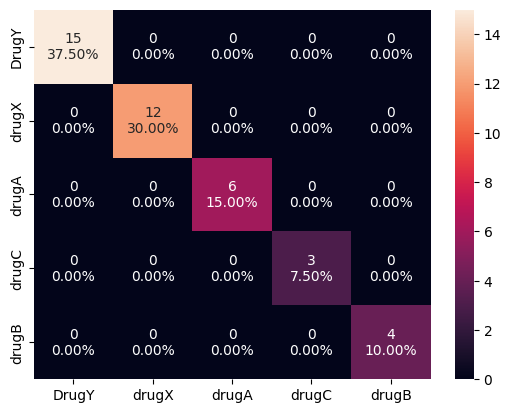

In [128]:
confusion = metrics.confusion_matrix(y_true=test_labels,y_pred=pred_labels)#[0]
fig, axs = plt.subplots()
#label_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
label_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]
label_percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(label_counts, label_percentages)]
labels = np.asarray(labels).reshape(confusion.shape[0],confusion.shape[1])
#print(labels)

axs = sns.heatmap(confusion, annot=labels, fmt='')
axs.set_xticklabels(list(d.keys())); 
axs.set_yticklabels(list(d.keys()));

In [127]:
len([x for x in test_labels if x==0]) # Checking the correctness of confusion matrix variables

15